In [1]:
# Import many dataFrame for the Algorithm Comparison:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from scipy import stats
import glob
import os
pd.set_option('display.max_rows', 500)
from scipy.stats import gaussian_kde
from scipy.stats import sem
import seaborn as sns

### Import our libraries
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../data_preprocessing/')
import fixation_plots as plots
import utility


In [2]:
fixations = []
el_data = []
trial_data = []
for files in sorted(glob.glob("../data/lb_data/last_fixation_data/*.csv"),key=os.path.getmtime):
    df_temp = pd.read_csv(files, index_col=False)
    fixations.append(df_temp)
lb_fix = pd.concat(fixations, axis=0, ignore_index=True)
for files in sorted(glob.glob("../data/el_data/last_fixation_data/*.csv"),key=os.path.getmtime):
    print(files)
    df_temp = pd.read_csv(files, index_col=False)
    el_data.append(df_temp)
    
el_fix = pd.concat(el_data, axis=0, ignore_index=True)
for files in sorted(glob.glob("../data/lb_data/lb_trial_pp/*.csv"),key=os.path.getmtime):
    df_temp = pd.read_csv(files, index_col=False)
    trial_data.append(df_temp)
all_trials = pd.concat(trial_data, axis=0, ignore_index=True)

../data/el_data/last_fixation_data\3_lb_fix.csv
../data/el_data/last_fixation_data\4_lb_fix.csv
../data/el_data/last_fixation_data\5_lb_fix.csv
../data/el_data/last_fixation_data\6_lb_fix.csv
../data/el_data/last_fixation_data\10_lb_fix.csv
../data/el_data/last_fixation_data\7_lb_fix.csv
../data/el_data/last_fixation_data\8_lb_fix.csv
../data/el_data/last_fixation_data\9_lb_fix.csv
../data/el_data/last_fixation_data\11_lb_fix.csv
../data/el_data/last_fixation_data\12_lb_fix.csv
../data/el_data/last_fixation_data\13_lb_fix.csv


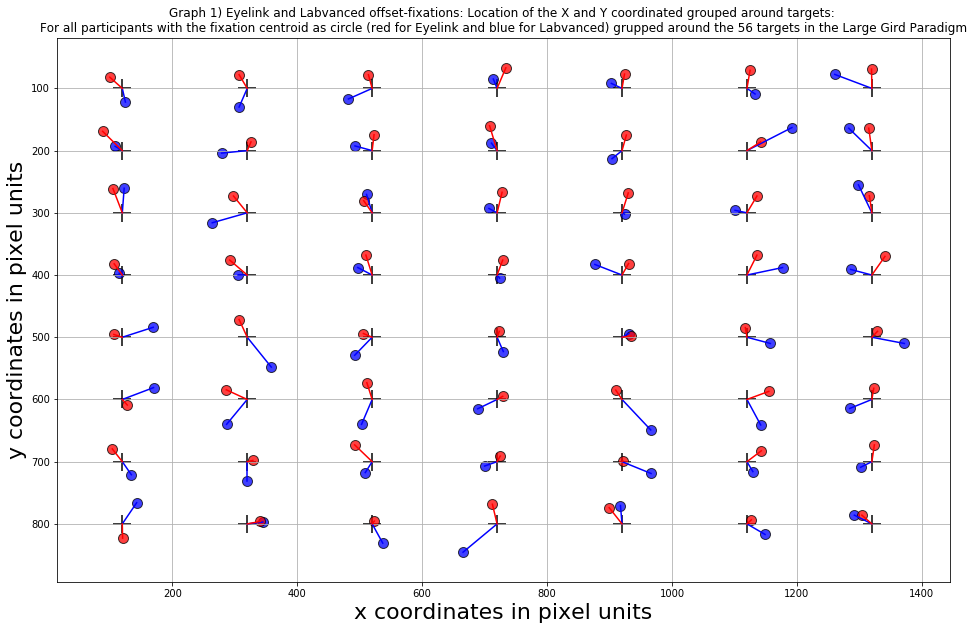

In [4]:
# For plotting the data round the target
plots.plotCentroidsToTargets(lb_fix,el_fix,all_trials)

In [5]:
lb_grouped_participant = lb_fix.groupby(['Participant_Nr'])
el_grouped_participant = el_fix.groupby(['Participant_Nr'])


In [6]:
len(lb_fix.Participant_Nr.unique())
len(el_fix.Participant_Nr.unique())


11

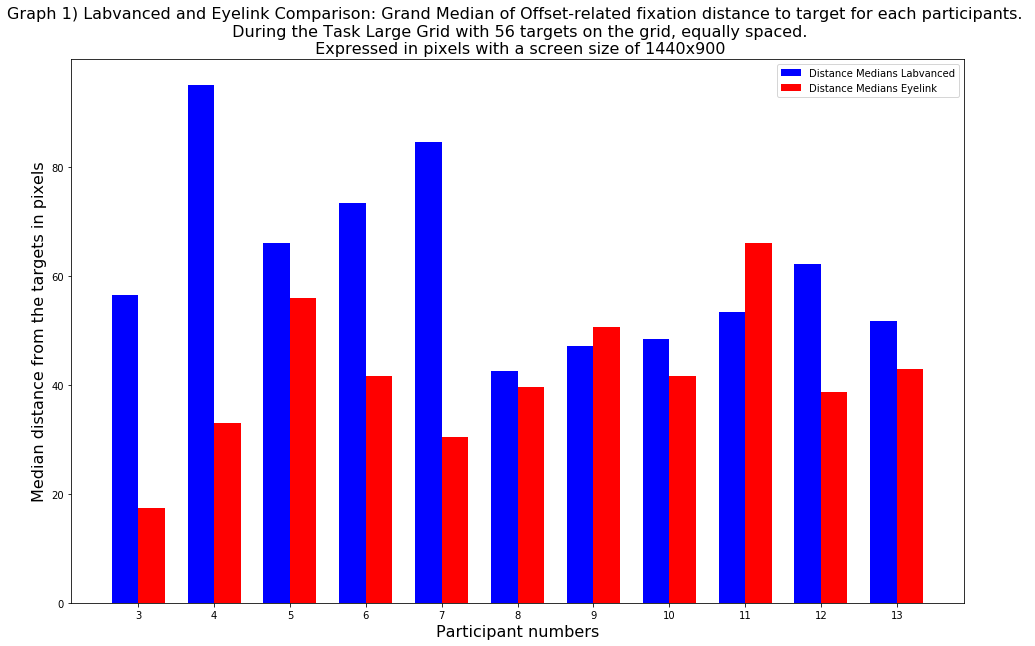

In [8]:
graph_counter = 0
graph_counter = graph_counter + 1
labels = lb_grouped_participant.Participant_Nr.first()
lb_medians = lb_grouped_participant['distance'].median()
el_medians = el_grouped_participant['distance'].median()

x = np.arange(len(labels)) + 3 # the label locations
x
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, figsize=(16,10))
rects1 = ax.bar(x - width/2, lb_medians, width, label='Distance Medians Labvanced',color='blue')
rects2 = ax.bar(x + width/2, el_medians, width, label='Distance Medians Eyelink', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Graph '+str(graph_counter)+') Labvanced and Eyelink Comparison: Grand Median of Offset-related fixation distance to target for each participants. \n During the Task Large Grid with 56 targets on the grid, equally spaced.\n Expressed in pixels with a screen size of 1440x900',fontsize=16)
ax.set_ylabel('Median distance from the targets in pixels', fontsize=16)
ax.set_xlabel('Participant numbers', fontsize=16)
# Fix the x-axes.
# ax.set_xticks(x + bar_width / 2)
# ax.set(xticks=np.arange(lb_fix.Rec_Session_Id_x.unique))
bar_width = 0.5
ax.set_xticks(labels)
ax.legend()

plt.show()

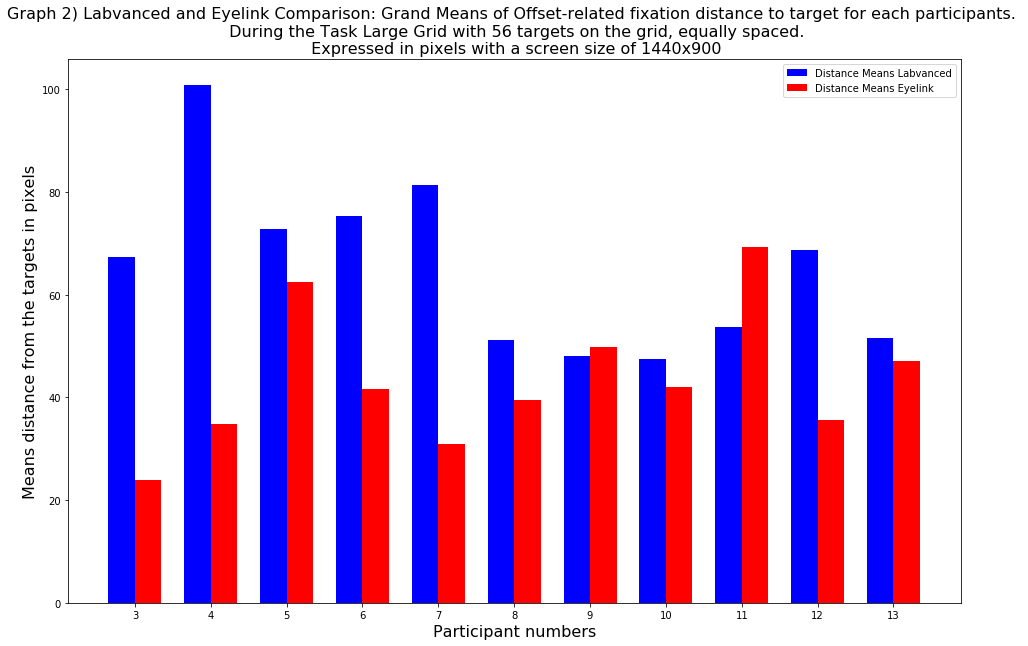

In [9]:
graph_counter = graph_counter + 1
labels = lb_grouped_participant.Participant_Nr.first()
lb_medians = lb_grouped_participant['distance'].mean()
el_medians = el_grouped_participant['distance'].mean()

x = np.arange(len(labels)) + 3 # the label locations
x
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, figsize=(16,10))
rects1 = ax.bar(x - width/2, lb_medians, width, label='Distance Means Labvanced',color='blue')
rects2 = ax.bar(x + width/2, el_medians, width, label='Distance Means Eyelink', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Graph '+str(graph_counter)+') Labvanced and Eyelink Comparison: Grand Means of Offset-related fixation distance to target for each participants. \n During the Task Large Grid with 56 targets on the grid, equally spaced.\n Expressed in pixels with a screen size of 1440x900',fontsize=16)
ax.set_ylabel('Means distance from the targets in pixels', fontsize=16)
ax.set_xlabel('Participant numbers', fontsize=16)
# Fix the x-axes.
# ax.set_xticks(x + bar_width / 2)
# ax.set(xticks=np.arange(lb_fix.Rec_Session_Id_x.unique))
bar_width = 0.5
ax.set_xticks(labels)
ax.legend()

plt.show()

In [10]:
graph_counter = graph_counter + 1
def grand_barplot(method):
    all_over_means = []
    if(method == "mean"):
        lb_over_means = np.mean(lb_fix['distance'])
        el_over_means = np.mean(el_fix['distance'])
        all_over_means = [lb_over_means, el_over_means]
        all_over_std =[lb_fix['distance'].std(), el_fix['distance'].std()]
    if(method == "std"):
        lb_over_std = np.std(lb_fix['distance'])
        el_over_std = np.std(el_fix['distance'])
        all_over_std=[lb_over_std, el_over_std]
    if(method == "sem"):
        lb_over_sem = sem(lb_fix['distance'])
        el_over_sem = sem(el_fix['distance'])
        all_over_sem=[lb_over_sem, el_over_sem] 

    # create a dataset
    fig, ax = plt.subplots(1, figsize=(8,8))
    height = all_over_means
    bars = ['Labvanced', 'Eyelink']
    x_pos = np.arange(len(bars))
    # Create bars with different colors
    plt.bar(x_pos, height, color=['blue', 'red'],yerr=all_over_std, align='center', alpha=0.5, ecolor='black', capsize=10)

    # Create names on the x-axis
    plt.xticks(x_pos, bars)
    plt.title('Graph '+str(graph_counter)+') Std of all distances of offset-related fixation to target,\n from two Eyetrackers, during the large grid task, over all subjects',fontsize=16)
    plt.xlabel('The type of the Eyetracker', fontsize=16)
    plt.ylabel('Distance of the offset-related fixations\n in pixels to target', fontsize=16)
    print('The STD for Distance to targets is Labvanced=' + str(lb_fix['distance'].std()) +' \nand Eyelink=' +str(el_fix['distance'].std()) +'')
    # Show graph
    plt.show()


The STD for Distance to targets is Labvanced=38.93630894518896 
and Eyelink=23.683230583143544


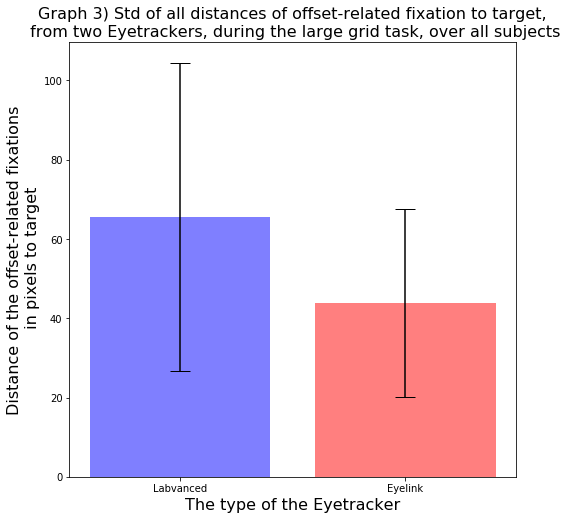

In [11]:
grand_barplot('mean')

In [89]:
# 5th Percentile
def q0(x):
    return x.quantile(0)

# 50th Percentile
def q25(x):
    return x.quantile(0.25)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)

# 25th Percentile
def q50(x):
    return x.quantile(0.24)

# 50th Percentile
def q50(x):
    return x.quantile(0.5)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)

lb_quant = lb_fix.groupby(['Participant_Nr']).agg({'distance': ['min', q25, 'median', q90, 'max']})
el_quant = el_fix.groupby(['Participant_Nr']).agg({'distance': ['min', q25, 'median', q90, 'max']})
el_quant

distance                                              
                      min        q25     median         q90         max
Participant_Nr                                                         
3                5.830952  13.741900  17.464249   45.607017   65.764732
4               10.000000  27.329317  32.984845   42.495413   92.135769
5               15.264338  41.244950  55.954737  104.404215  149.482440
6               13.038405  31.542438  41.612018   59.102781   63.324561
7                6.324555  22.090722  30.479501   48.187141   52.201533
8                3.000000  19.482475  39.582592   72.318680  128.736164
9               21.023796  42.374102  50.587402   64.597186   76.485293
10              14.866069  33.526109  41.677332   58.023994   80.653580
11              22.360680  57.905779  66.030296   96.540147  146.348898
12               1.000000  17.000000  38.626416   56.089215   79.246451
13               8.062258  33.600595  43.011626   81.503091  106.733313

In [69]:
lb_grouped_participant = lb_fix.groupby(['Participant_Nr'])
el_grouped_participant = el_fix.groupby(['Participant_Nr'])

No handles with labels found to put in legend.


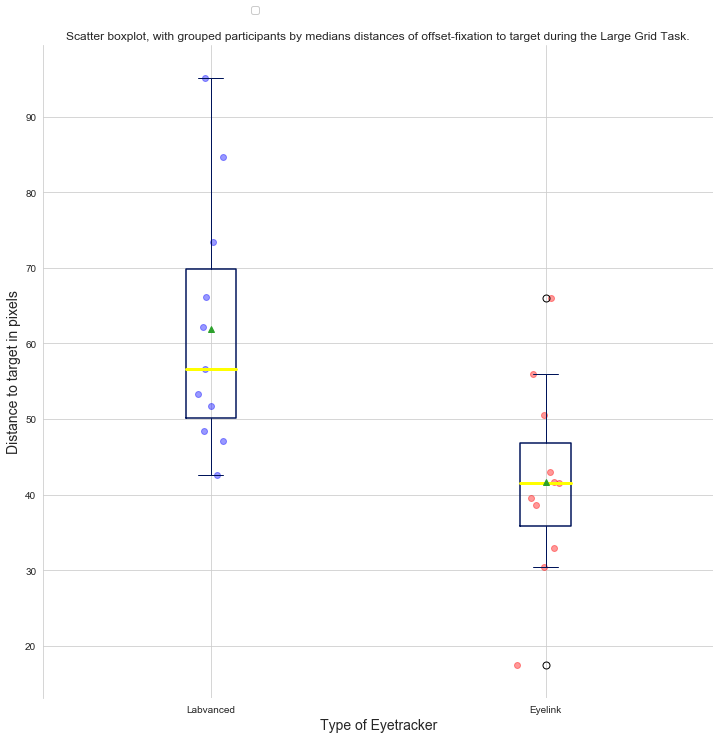

In [88]:
# lb_dist_row = np.array(lb_fix['distance'])
# el_dist_row = np.array(el_fix['distance'])

lb_grouped_subject_row = np.array(lb_grouped_participant.distance.median())
el_grouped_subject_row = np.array(el_grouped_participant.distance.median())


##### Set style options here #####
sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=7,
                  linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=3, linestyle='-', color='yellow')
meanprops = dict(linewidth=3, linestyle='--', color='purple')
fig = plt.figure(figsize =(12, 12) )


df = pd.DataFrame(el_grouped_subject_row, lb_grouped_subject_row ).reset_index().rename(columns={'index':'Labvanced', 0:'Eyelink'})
df.index = df.index + 3
vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
plt.boxplot(vals, labels=names, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,capprops=capprops, flierprops=flierprops, medianprops=medianprops, meanprops = meanprops, showmeans=True, showbox=True)
palette = ['b', 'r']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
    
plt.xlabel("Type of Eyetracker", fontweight='normal', fontsize=14)
plt.ylabel("Distance to target in pixels", fontweight='normal', fontsize=14)
plt.title('Scatter boxplot, with grouped participants by medians distances of offset-fixation to target during the Large Grid Task.')
sns.despine(bottom=True) # removes right and top axis lines
# plt.axhline(y=65, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value')
plt.legend(bbox_to_anchor=(0.31, 1.06), loc=2, borderaxespad=0., framealpha=1, facecolor ='white', frameon=True)


plt.show()

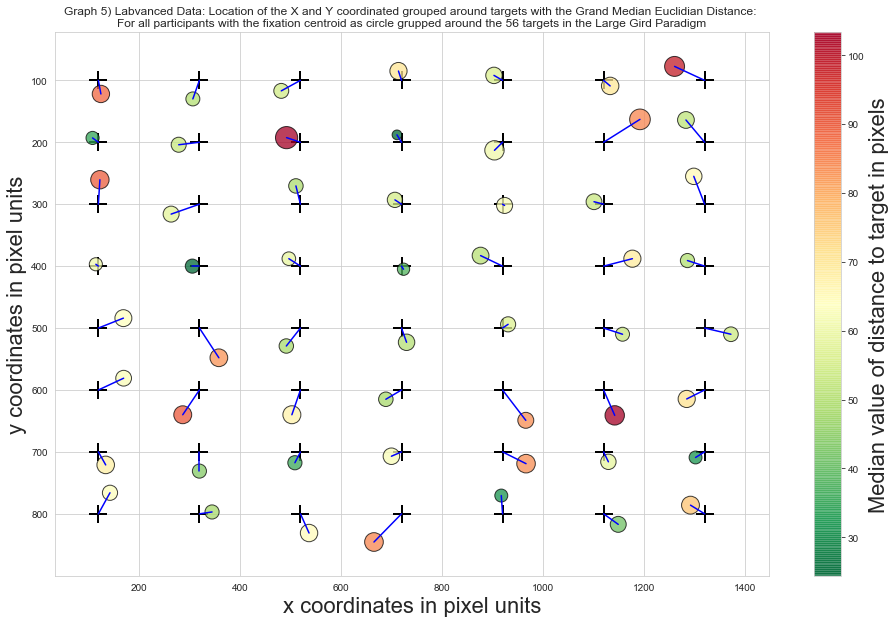

In [13]:
graph_counter = graph_counter + 1 + 1
lb_grouped = lb_fix.groupby(['targetX', 'targetY'])
trials_grouped = all_trials.groupby(['targetX', 'targetY'])

grouped_fixations_by_trials = lb_grouped
grouped_trials = trials_grouped
# plt.plot(x_values, y_values, color='blue')

point2 = [grouped_fixations_by_trials.x.median(), grouped_fixations_by_trials.y.median()]
point1 = [grouped_trials.targetX.first(), grouped_trials.targetY.first()]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

fig, ax = plt.subplots(1, figsize=(16,10))
plt.plot(x_values, y_values, color='blue')
plt.gca().invert_yaxis()
plt.scatter(all_trials.targetX, all_trials.targetY, marker='+', c='Black', s=300)
plt.scatter(grouped_fixations_by_trials.x.median(), grouped_fixations_by_trials.y.median(), marker='o', c =grouped_fixations_by_trials.distance.median(), s=grouped_fixations_by_trials.distance.mean()*4, cmap="RdYlGn_r", edgecolor='black', linewidth=1, alpha=0.75,)
cbar = plt.colorbar()
cbar.set_label('Median value of distance to target in pixels', fontsize=22)
plt.title('Graph '+str(graph_counter)+') Labvanced Data: Location of the X and Y coordinated grouped around targets with the Grand Median Euclidian Distance: \nFor all participants with the fixation centroid as circle grupped around the 56 targets in the Large Gird Paradigm',fontsize=12)
plt.xlabel('x coordinates in pixel units',fontsize=22)
plt.ylabel('y coordinates in pixel units',fontsize=22)

plt.grid(True)
plt.savefig('./analysis_graphs/centroid_target_median_LB.jpg')
plt.show()

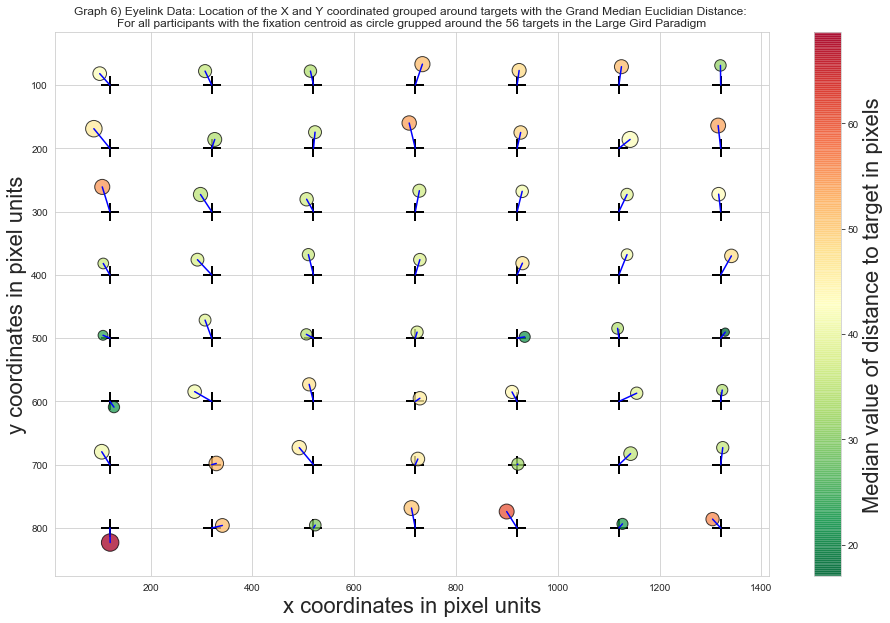

In [14]:
graph_counter = graph_counter  + 1
el_grouped = el_fix.groupby(['targetX', 'targetY'])
trials_grouped = all_trials.groupby(['targetX', 'targetY'])

grouped_fixations_by_trials = el_grouped
grouped_trials = trials_grouped
# plt.plot(x_values, y_values, color='blue')

point2 = [grouped_fixations_by_trials.x.median(), grouped_fixations_by_trials.y.median()]
point1 = [grouped_trials.targetX.first(), grouped_trials.targetY.first()]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

fig, ax = plt.subplots(1, figsize=(16,10))
plt.plot(x_values, y_values, color='blue')
plt.gca().invert_yaxis()
plt.scatter(all_trials.targetX, all_trials.targetY, marker='+', c='Black', s=300)
plt.scatter(grouped_fixations_by_trials.x.median(), grouped_fixations_by_trials.y.median(), marker='o', c =grouped_fixations_by_trials.distance.median(), s=grouped_fixations_by_trials.distance.mean()*4, cmap="RdYlGn_r", edgecolor='black', linewidth=1, alpha=0.75,)
cbar = plt.colorbar()
cbar.set_label('Median value of distance to target in pixels', fontsize=22)
plt.title('Graph '+str(graph_counter)+') Eyelink Data: Location of the X and Y coordinated grouped around targets with the Grand Median Euclidian Distance: \nFor all participants with the fixation centroid as circle grupped around the 56 targets in the Large Gird Paradigm',fontsize=12)
plt.xlabel('x coordinates in pixel units',fontsize=22)
plt.ylabel('y coordinates in pixel units',fontsize=22)

plt.grid(True)
plt.savefig('./analysis_graphs/centroid_target_median_ET.jpg')
plt.show()

In [17]:
def destinySaccterPlot(eyetracket_type, df):
    if(eyetracket_type == "lb"):
        et_name = 'Labvanced'
    else:
        et_name = 'Eyelink'
    # x = grouped_fixations_by_trials.x.median()
    # y = grouped_fixations_by_trials.y.median()
    x = df.x
    y = df.y
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # z
    fig, ax = plt.subplots(figsize=(16,10))
    plt.gca().invert_yaxis()
    ax.scatter(x, y, c=z, s=100, cmap="RdYlGn_r", edgecolor='black', linewidth=1, alpha=0.75,)
    ax.scatter(all_trials.targetX, all_trials.targetY, marker='+', c='Black', s=300)
    plt.title('Graph '+str(graph_counter)+') '+et_name+' Data: Gaussian kde of offset_related fixations around targer: \nFor all participants in the Large Gird',fontsize=12)
    plt.xlabel('x coordinates in pixel units',fontsize=22)
    plt.ylabel('y coordinates in pixel units',fontsize=22)
    plt.show()

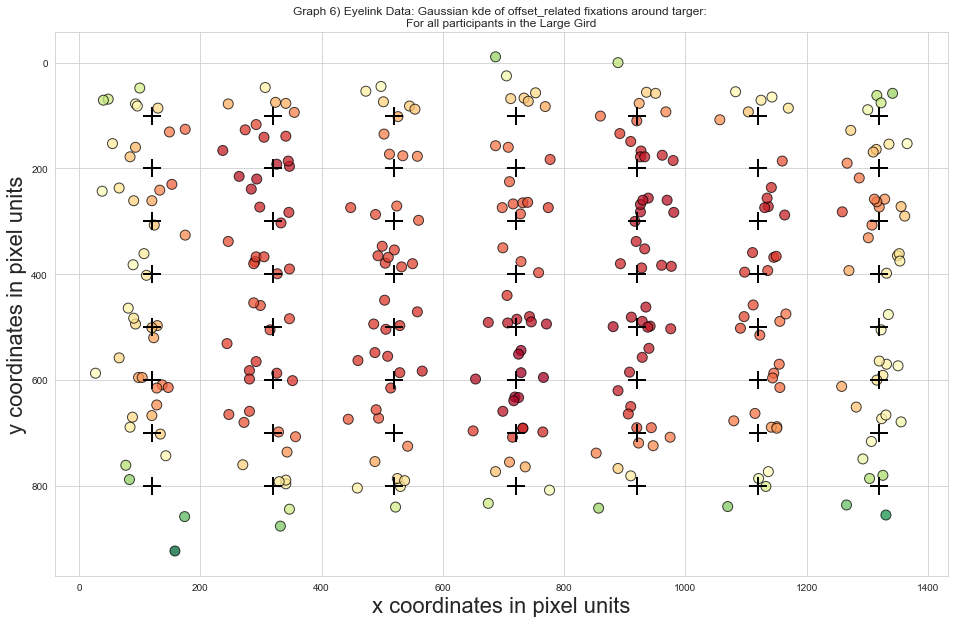

In [18]:
destinySaccterPlot('el',el_fix)

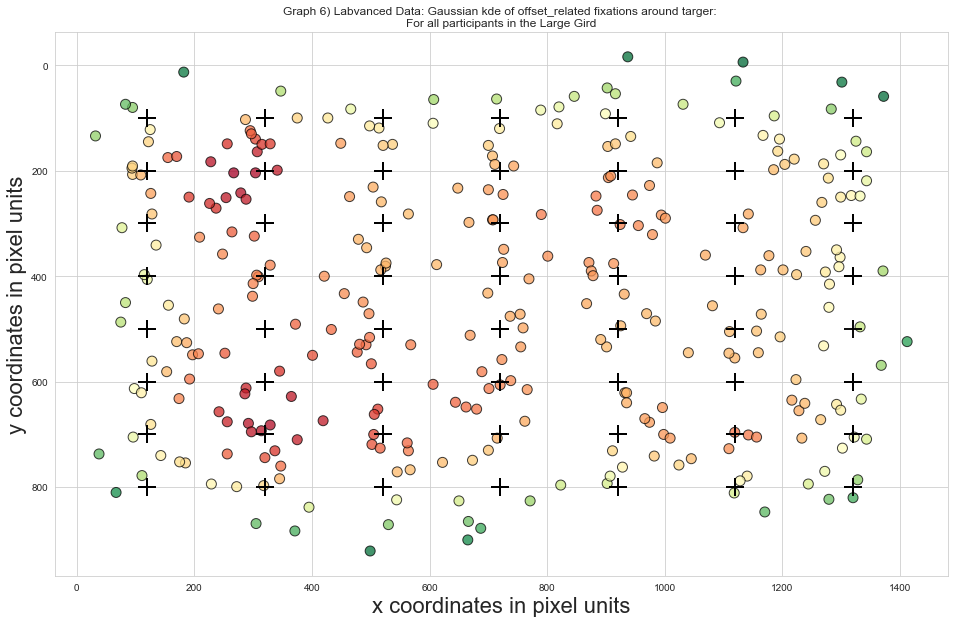

In [19]:
destinySaccterPlot('lb',lb_fix)

In [94]:
lb_grouped_participant.distance.describe()

,count,mean,std,min,25%,50%,75%,max
Participant_Nr,,,,,,,,
3,31.0,67.414086,37.128413,4.472136,45.837995,56.612719,84.618876,138.101412
4,27.0,100.824788,54.799206,19.924859,65.150785,95.078915,126.917261,244.616026
5,32.0,72.747413,40.956329,4.123106,42.188990,66.164355,94.320074,159.477271
6,38.0,75.353507,42.577833,11.180340,41.859187,73.411413,96.446474,159.050307
7,25.0,81.283948,40.294745,14.422205,66.910388,84.599054,103.368274,180.277564
8,34.0,51.213533,31.394324,5.385165,27.508541,42.660319,72.401133,134.059688
9,36.0,48.160533,21.911686,5.830952,33.920872,47.075752,58.223773,97.744565
10,29.0,47.576565,19.648377,8.602325,35.227830,48.383882,57.245087,94.047860
11,31.0,53.799815,27.205377,9.219544,29.705441,53.366656,69.314648,122.808794


In [105]:
el_grouped_participant.distance.describe()

,count,mean,std,min,25%,50%,75%,max
Participant_Nr,,,,,,,,
3,31.0,23.935458,15.584083,5.830952,13.741900,17.464249,32.023692,65.764732
4,27.0,34.874834,15.645275,10.000000,27.329317,32.984845,38.314346,92.135769
5,32.0,62.431338,30.556398,15.264338,41.244950,55.954737,83.727564,149.482440
6,38.0,41.723809,12.834394,13.038405,31.542438,41.612018,51.736840,63.324561
7,25.0,31.003668,12.687452,6.324555,22.090722,30.479501,41.880783,52.201533
8,34.0,39.569042,26.960066,3.000000,19.482475,39.582592,50.161644,128.736164
9,36.0,49.747622,12.583741,21.023796,42.374102,50.587402,56.998952,76.485293
10,29.0,41.946965,14.490281,14.866069,33.526109,41.677332,47.927028,80.653580
11,31.0,69.289476,24.094276,22.360680,57.905779,66.030296,80.268281,146.348898


In [91]:
# Paired T test for two Eyetrackers
df.describe()

,Labvanced,Eyelink
count,11.000000,11.000000
mean,61.940216,41.637365
std,16.560471,12.957576
min,42.660319,17.464249
25%,50.085956,35.805630
50%,56.612719,41.612018
75%,69.787884,46.799514
max,95.078915,66.030296


In [99]:
paired_Ttest_lb = stats.shapiro(df['Labvanced'])
print('The Shapiro-Wilk test for normality first value is the W test value, and the second value it the p-value. ')
print(paired_Ttest_lb)


The Shapiro-Wilk test for normality first value is the W test value, and the second value it the p-value. 
(0.9162346720695496, 0.2885156571865082)


In [100]:
paired_Ttest_el = stats.shapiro(df['Eyelink'])
print('The Shapiro-Wilk test for normality first value is the W test value, and the second value it the p-value. ')
print(paired_Ttest_el)

The Shapiro-Wilk test for normality first value is the W test value, and the second value it the p-value. 
(0.9719218015670776, 0.9052402377128601)


In [101]:
stats.ttest_rel(df['Labvanced'], df['Eyelink'])

Ttest_relResult(statistic=2.806113687755424, pvalue=0.01859846445550609)